# k-Nearest Neighbors for Classification

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
list(digits.keys())

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

In [2]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [3]:
digits["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
X = digits["data"]
y = digits["target"]
print(X.shape, y.shape)

(1797, 64) (1797,)


# Impact of k

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

knn = KNeighborsClassifier(n_neighbors=5) # change number of neighbors k to 10, 100, 200, 500
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))


Accuracy: 0.98

Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98

Macro Precision: 0.98
Macro Recall: 0.98
Macro F1-score: 0.98



# Impact of Searching Algorithm

In [8]:
import time

time1 = time.time()
knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute') #brute, kd_tree,ball_tree
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
time2 = time.time()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Time: {:.2f}'.format(time2-time1))


Accuracy: 0.98

Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98

Macro Precision: 0.98
Macro Recall: 0.98
Macro F1-score: 0.98

Time: 0.06


# k-Nearest Neighbors for Regression

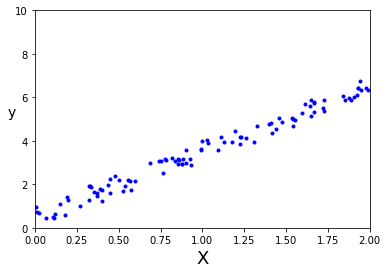

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) #X are 100 inputs with 1-dimensional feature randomly distributed in [0, 2)
y = 3 * X + np.random.rand(100, 1) #y are true label values

plt.plot(X, y, 'b.')
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsRegressor

LR_model = KNeighborsRegressor(n_neighbors=5)
LR_model.fit(X, y)

KNeighborsRegressor()

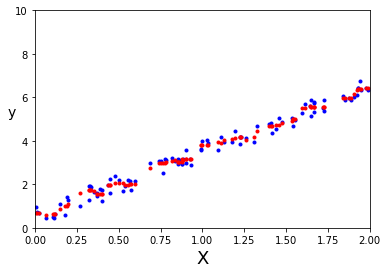

In [12]:
plt.plot(X, y, "b.")
plt.plot(X, LR_model.predict(X), "r.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 2, 0, 10])
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Root Mean Square Error (RMSE)
mse = mean_squared_error(y, LR_model.predict(X))
rmse = np.sqrt(mse)

#Mean Absolute Error (MAE)
mae = mean_absolute_error(y, LR_model.predict(X))

print("Root Mean Square Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Square Error (RMSE): 0.219164183501499
Mean Absolute Error (MAE): 0.1778200787377611
